<span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#fff;">------------------

<span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#fff;">------------------
<span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#fa9200;">FIFA World Cup
    
 
    

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Dataset Information:-

The FIFA World Cup is a global football competition contested by the various football-playing nations of the world. It is contested every four years and is the most prestigious and important trophy in the sport of football.

The FIFA World Cup, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War.

The World Cups dataset shows all information about all the World Cups in history till 2014, while the World Cup Matches dataset shows all the results from the matches contested as part of the cups.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Problem Statement:-
    
    

A new football club named ‘Brussels United FC’ has just been inaugurated. As a member of this club, you have been assigned a task to carry analysis on matches, players, and world cup data. Here we need to analyze the countries which have won the world cup the most with attendance, goal, and matches per cup based on cities. Also distribution of home and away goals. Whether playing in the home country is a factor for winning or not?

**Steps needs to be followed-**


* Total goals scored by year
* Total matches played and qualified teams by year
* Matches with the highest number of attendance
* Cities that hosted highest world cup matches
* Average attendance by city
* Teams with the most world cup final victories
* World cup final results by nation
* Match outcomes by home and away teams

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Data Definition:-

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">1. World Cup Matches Dataset

**Year**: The year in which the match was played

**Datetime**: The Date on which the match was played along with a 24 hour format time

**Stage**: The stage at which the match was played

**Stadium**: Stadium name where the match was held

**City**: The city name, where the match was played

**Home Team Name**: Home team country name

**Home Team Goals**: Total goals scored by the home team by the end of the match

**Away Team Goals**: Total goals scored by the away team by the end of the match

**Away Team Name**: Away team country name

**Win conditions**: Special win condition (if any)

**Attendance**: Total crowd present at the stadium

**Half-time Home Goals**: Goals scored by the home team until half time

**Half-time Away Goals**: Goals scored by the away team until half time

**Referee**: Name of the first referee

**Assistant 1**: Name of the first assistant referee (linesman)

**Assistant 2**: Name of the second assistant referee (linesman)

**RoundID**: Unique ID of the Round

**MatchID**: Unique ID of the Match

**Home Team Initials**: Home team country's three letter initials

**Away Team Initials**: Away team country's three left

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">2. World Cup Players Dataset
    

**RoundID**: Unique ID of the Round

**MatchID**: Unique ID of the Match

**Team Initials**: Player's team country's three letter initials
    
**Coach Name**: Player's coach name
    
**Line-up**: Indicates whether the player was in the starting line-up or not
    
**Shirt Number**: Player's shirt number
    
**Player Name**: Player's name
    
**Position**: Position that the player played in
    
**Event**: Important event involving the player (if any)
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">3. World Cup Dataset
    
**Year**: Year in which the world cup was held
    
**Country**: Country where the world cup was held
    
**Winner**: Team that won the world cup
    
**Runners-Up**: Team that came second
    
**Third**: Team that came third
    
**Fourth**: Team that came fourth
    
**GoalsScored**: Total goals scored in the world cup
    
**QualifiedTeams**: Number of teams that qualified for the world cup
    
**MatchesPlayed**: Total matches played in the world cup
    
**Attendance**: Total attendance in the world cup

In [134]:
#Your Code here
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
#Reading the data form the three files
wc = pd.read_csv('WorldCups.csv')
pl = pd.read_csv('WorldCupPlayers.csv')
ma = pd.read_csv("WorldCupMatches.csv")


In [5]:
# a glance on the world cups
wc.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [15]:
# a glance on the world players
pl.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [14]:
# a glance on the world matches
ma.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [7]:
#world cup data info
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [6]:
#experimenting 
wc.groupby('Year').sum('GoalsScored')

,GoalsScored,QualifiedTeams,MatchesPlayed
Year,,,
1930,70,13,18
1934,70,16,17
1938,84,15,18
1950,88,13,22
1954,140,16,26
1958,126,16,35
1962,89,16,32
1966,89,16,32
1970,95,16,32


In [8]:
wc.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [23]:
#See the shapes of the three data sets, to know how many rows and columns we're studying
print(wc.shape,pl.shape , ma.shape)
wc.dtypes

(20, 10) (37784, 9) (4572, 20)


Year               int64
Country           object
Winner            object
Runners-Up        object
Third             object
Fourth            object
GoalsScored        int64
QualifiedTeams     int64
MatchesPlayed      int64
Attendance        object
dtype: object

In [25]:
#Statistical data on world cups
wc.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [27]:
#Statistical data on Players
pl.describe()

,RoundID,MatchID,Shirt Number
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


In [28]:
#Statistical data on Matches
ma.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [29]:
#Statistical data on world cups for the Oridnal reading
wc.describe(include=object)

,Country,Winner,Runners-Up,Third,Fourth,Attendance
count,20,20,20,20,20,20
unique,15,9,10,14,16,20
top,Mexico,Brazil,Argentina,Germany,Uruguay,1.603.975
freq,2,5,3,3,3,1


In [31]:
wc.isnull().sum() #Checking if we have null values

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

I extracted the percentages (average of missing data) in a different way

In [64]:
x = [pl.isnull().sum(),pl.count()]
x = pd.DataFrame(x).T
x['Percentage'] = x[0]/x[1]
x

,0,1,Percentage
RoundID,0,37784,0.0
MatchID,0,37784,0.0
Team Initials,0,37784,0.0
Coach Name,0,37784,0.0
Line-up,0,37784,0.0
Shirt Number,0,37784,0.0
Player Name,0,37784,0.0
Position,0,37784,0.0
Event,0,37784,0.0


In [54]:
#Removing null values then run the above check (inplace=True will apply the changes on the subject dataframe)
df1 = pl['Event'].value_counts().index[0]
pl['Event'].fillna(df1,inplace = True)

df1 = pl['Position'].value_counts().index[0]
pl['Position'].fillna(df1,inplace = True)

In [147]:
pl['Position'].value_counts()

GK     36082
C       1510
GKC      192
Name: Position, dtype: int64

I want to add a field to see how the negative corrilation looks like

In [69]:
wc['NegCor'] = 2020 - wc['Year']

In [66]:
wc.corr()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
Year,1.000000,0.829886,0.895565,0.972473
GoalsScored,0.829886,1.000000,0.866201,0.876201
QualifiedTeams,0.895565,0.866201,1.000000,0.949164
MatchesPlayed,0.972473,0.876201,0.949164,1.000000


<AxesSubplot:>

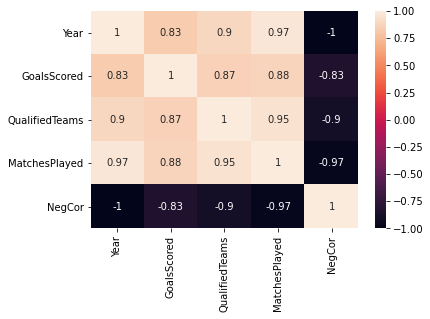

In [70]:
sns.heatmap(wc.corr() , annot=True)

<AxesSubplot:title={'center':'Home Team Goals'}, xlabel='Away Team Goals'>

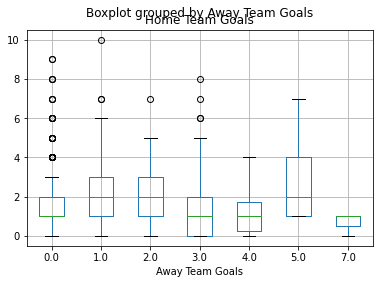

In [71]:
#trying to see the distribution for the number of home / away team goals (and checking the outliners)
ma.boxplot(column='Home Team Goals',by='Away Team Goals')

<AxesSubplot:title={'center':'All Goals'}, xlabel='Year'>

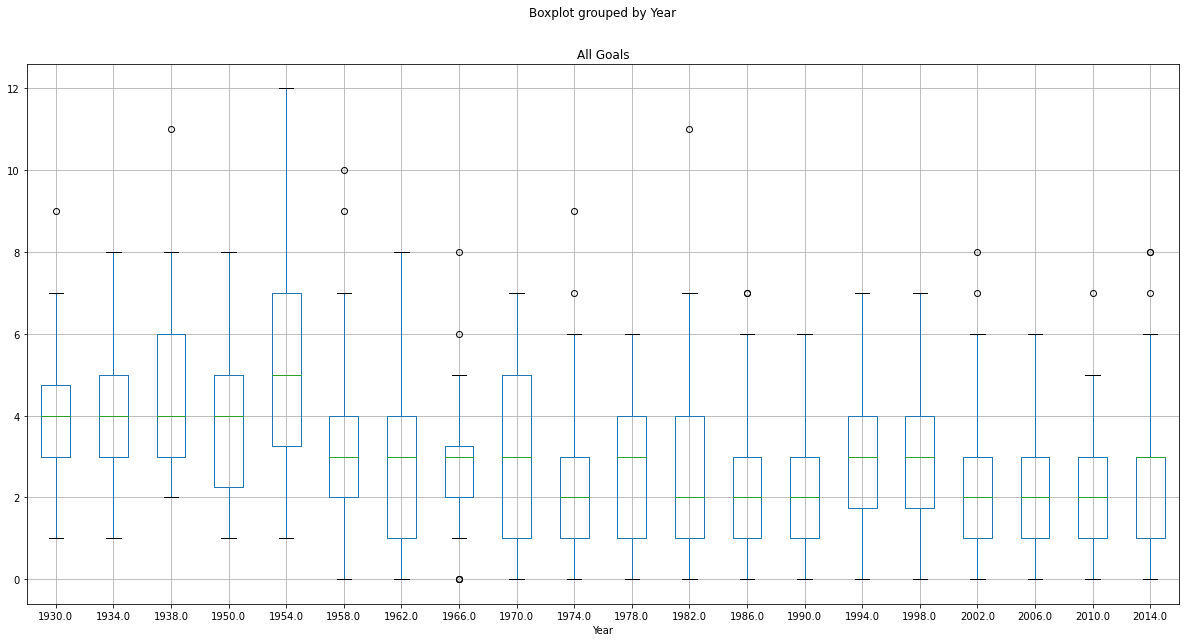

In [148]:
#ma.info()
#checking the box bar for the number of goals by year (more and more the average goal scored decreased) => teams become more into defence rather attack
ma['All Goals'] = ma['Home Team Goals'] + ma['Away Team Goals']
ma.boxplot(column='All Goals',by='Year' , figsize = (20,10))

trying to allocate the reading that has the maximum value in 1954 which is 12


In [149]:
#mask=(Year == 1954.0)

#df = ma.mask(mask)
ma.head()
#ma[ma.City =='Montevideo']
df = ma[ma.Year ==1954.0]
df.sort_values(inplace = True, by='All Goals',   ascending=False)
df['All Goals'].max()


12.0

I'm not sure if the below is the correct way, as i think it removed ANYTHING above 8 across all years, while it should have happened by year

<AxesSubplot:title={'center':'All Goals'}, xlabel='Year'>

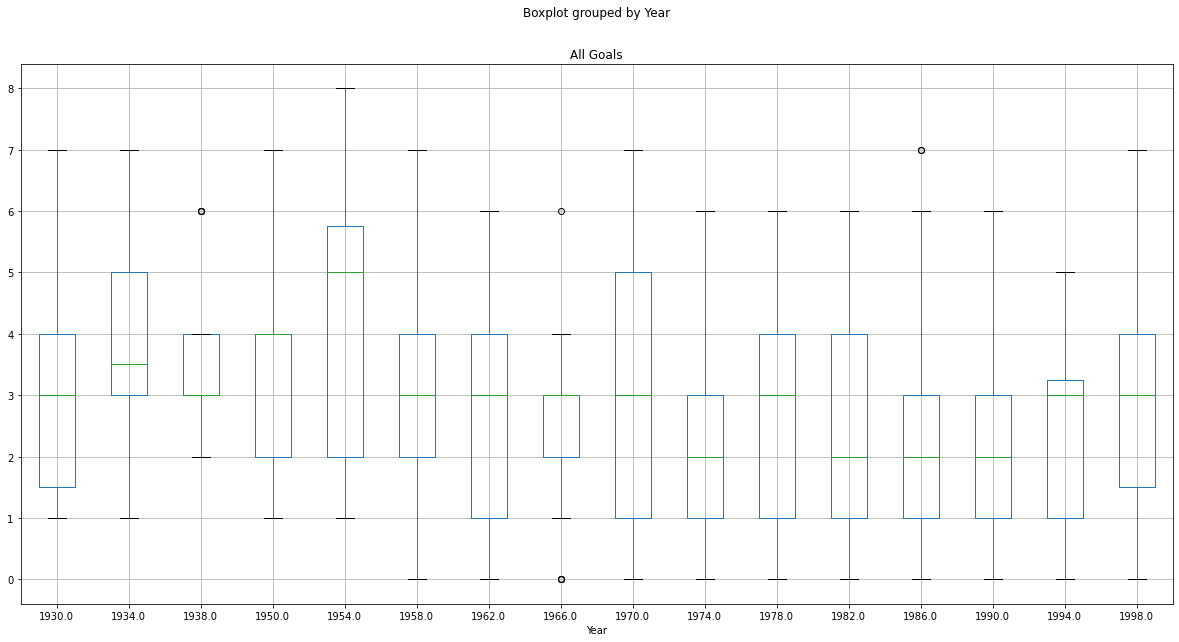

In [136]:
Q1=ma.quantile(0.25)
Q3=ma.quantile(0.75)
IQR = Q3-Q1
ma[~((ma<(Q1-125*IQR))| (ma>(Q3 + 1.5 * IQR))).any(axis=1)].boxplot(column='All Goals',by='Year' , figsize = (20,10))


<AxesSubplot:xlabel='Year', ylabel='Density'>

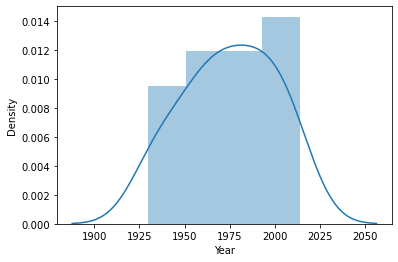

In [150]:
#using seaboarn differnet plots
sns.distplot(wc.Year)

<AxesSubplot:xlabel='GoalsScored', ylabel='Density'>

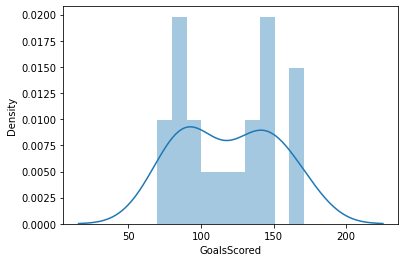

In [155]:
#the density of goal scored his hight somewhere around 70 and 140
sns.distplot(wc.GoalsScored, bins=10, label=True)

<AxesSubplot:xlabel='Country', ylabel='count'>

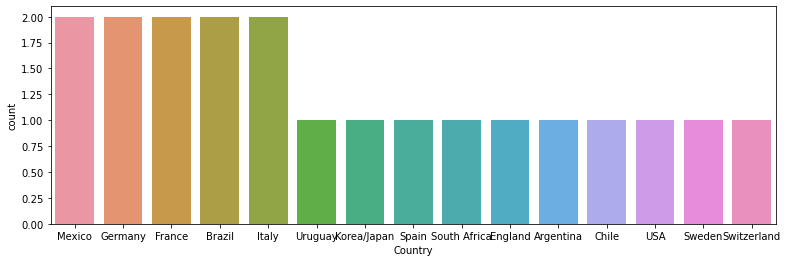

In [146]:
#frequency of the world cup held in different countries, the first 5 countires to the right hosted the WC twice each.
plt.figure(figsize = (13,4))
sns.countplot(wc.Country, order=wc.Country.value_counts().index)

<Figure size 1008x1008 with 0 Axes>

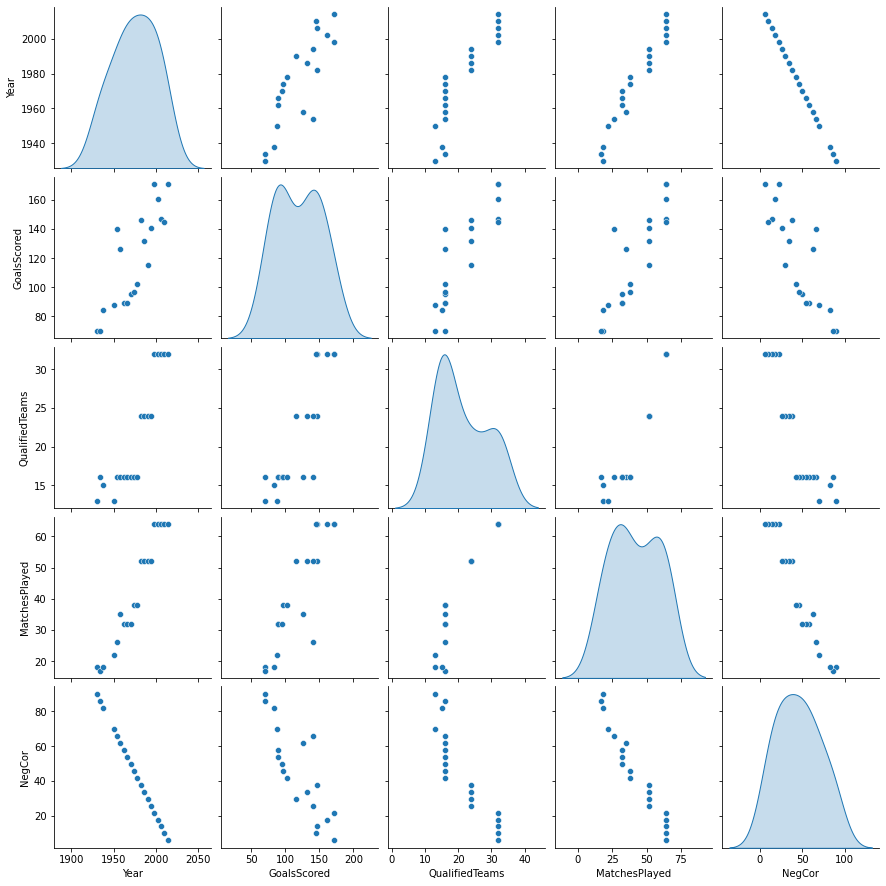

In [157]:
#finding plots and relation between the differnt numeric fields
plt.figure(figsize = (14,14))
sns.pairplot(wc,diag_kind = 'kde')

scatter plot: adding the average goals per the number of matchs played, first we add a new field (average goal), then we draw the scatter plot

<AxesSubplot:xlabel='Year', ylabel='AverageGoal'>

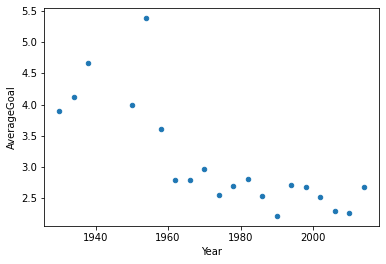

In [163]:
wc['AverageGoal'] = wc.GoalsScored/wc.MatchesPlayed
wc.plot(kind='scatter',x='Year',y='AverageGoal')


<AxesSubplot:xlabel='Year'>

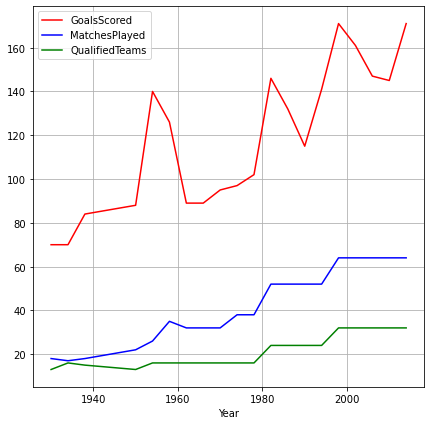

In [171]:
#an example of showing mutliple lines on the same figure, that helps to address the changes of several reading 
#in relation to a specific reading (year in the example below) and see wheather if the growth is steady or not
ax=plt.gca()
wc.plot(kind='line',x='Year',y="GoalsScored", color= "r",ax=ax,grid=True , figsize=(7,7))
wc.plot(kind='line',x='Year',y="MatchesPlayed", color= "b",ax=ax,grid=True , figsize=(7,7))
wc.plot(kind='line',x='Year',y="QualifiedTeams", color= "g",ax=ax,grid=True , figsize=(7,7))


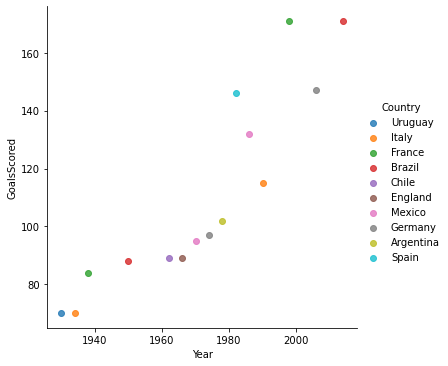

In [177]:
sns.lmplot(x='Year',y='GoalsScored',hue='Country',
          data=wc.loc[wc['Country'].isin(['Uruguay','Italy','France','Brazil','Chile','England','Mexico','Germany','Argentina','Spain'])]
          ,fit_reg=False
          
          )
#this example will show that the top goal scored were for Brazil and France
#it also help to see the relation for more than one variable

<AxesSubplot:>

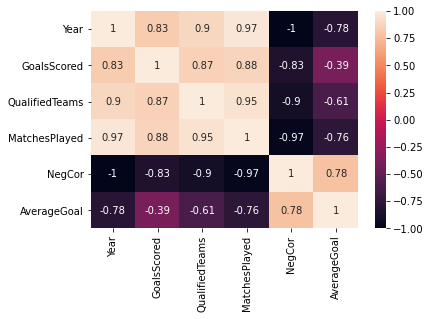

In [179]:
sns.heatmap(wc.corr(),annot=True)
#heatmap is the best way to represent the corrilation between multiple variables

In [184]:
#showing a filtered portion of the data to answer certain questions

wc[np.logical_and(wc['GoalsScored']>100 , wc['Year']>1930)]


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,NegCor,AverageGoal
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607,66,5.384615
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810,62,3.600000
10,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1.545.791,42,2.684211
11,1982,Spain,Italy,Germany FR,Poland,France,146,24,52,2.109.723,38,2.807692
12,1986,Mexico,Argentina,Germany FR,France,Belgium,132,24,52,2.394.031,34,2.538462
13,1990,Italy,Germany FR,Argentina,Italy,England,115,24,52,2.516.215,30,2.211538
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3.587.538,26,2.711538
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100,22,2.671875
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197,18,2.515625
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439,14,2.296875


In [189]:
def cup(count=5):
    ecg=wc.sort_values(by=['GoalsScored'],ascending=False).head(count)
    return ecg
print(cup())

    Year      Country   Winner  Runners-Up        Third          Fourth  \
19  2014       Brazil  Germany   Argentina  Netherlands          Brazil   
15  1998       France   France      Brazil      Croatia     Netherlands   
16  2002  Korea/Japan   Brazil     Germany       Turkey  Korea Republic   
17  2006      Germany    Italy      France      Germany        Portugal   
11  1982        Spain    Italy  Germany FR       Poland          France   

    GoalsScored  QualifiedTeams  MatchesPlayed Attendance  NegCor  AverageGoal  
19          171              32             64  3.386.810       6     2.671875  
15          171              32             64  2.785.100      22     2.671875  
16          161              32             64  2.705.197      18     2.515625  
17          147              32             64  3.359.439      14     2.296875  
11          146              24             52  2.109.723      38     2.807692  


In [194]:
def goals(country=15):
    Country = wc.at[country-1,'Country']
    year=wc.at[country-1,'Year']
    goals=wc.at[country-1,'GoalsScored']
    matches=wc.at[country-1,'MatchesPlayed']
    def AvgGoal(goals,matches):
        avg=goals/matches
        return avg
    print(Country,year)
    print('Average goal per match:' , AvgGoal(goals,matches))
    
goals(14)
goals(15)
goals(16)

Italy 1990
Average goal per match: 2.2115384615384617
USA 1994
Average goal per match: 2.7115384615384617
France 1998
Average goal per match: 2.671875


In [202]:
#using a function that reads a list of arguments and generate a result containing the location and the winner
def ulkeler(*args):
    for i in args:
        print(i)
countries=tuple(wc.iloc[:,wc.columns.get_loc('Country')])    
ulkeler(countries)

dict=wc.set_index('Country').to_dict()['Winner']


def f(**kwargs):
    for key , value in kwargs.items():
        print(key , " " , value)
        
f(**dict)

('Uruguay', 'Italy', 'France', 'Brazil', 'Switzerland', 'Sweden', 'Chile', 'England', 'Mexico', 'Germany', 'Argentina', 'Spain', 'Mexico', 'Italy', 'USA', 'France', 'Korea/Japan', 'Germany', 'South Africa', 'Brazil')
Uruguay   Uruguay
Italy   Germany FR
France   France
Brazil   Germany
Switzerland   Germany FR
Sweden   Brazil
Chile   Brazil
England   England
Mexico   Argentina
Germany   Italy
Argentina   Argentina
Spain   Italy
USA   Brazil
Korea/Japan   Brazil
South Africa   Spain


In [204]:
cups_data1 = wc.copy()
cups_data1["GoalMean"]=[round(cups_data1.GoalsScored[i]/cups_data1.MatchesPlayed[i],2) for i in range(len(cups_data1.GoalsScored))]
cups_data1.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,NegCor,AverageGoal,GoalMean
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,90,3.888889,3.89
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000,86,4.117647,4.12
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700,82,4.666667,4.67
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246,70,4.000000,4.00
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607,66,5.384615,5.38


In [205]:
print(cups_data1.index.name)
cups_data1.index.name="IndexName"
cups_data1.head(3)

None


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,NegCor,AverageGoal,GoalMean
IndexName,,,,,,,,,,,,,
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,90,3.888889,3.89
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000,86,4.117647,4.12
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700,82,4.666667,4.67


In [206]:
cups_data2 = cups_data1.set_index(["Winner","Year"]) 
cups_data2.head(3)

Country      Runners-Up    Third      Fourth  GoalsScored  \
Winner  Year                                                              
Uruguay 1930  Uruguay       Argentina      USA  Yugoslavia           70   
Italy   1934    Italy  Czechoslovakia  Germany     Austria           70   
        1938   France         Hungary   Brazil      Sweden           84   

              QualifiedTeams  MatchesPlayed Attendance  NegCor  AverageGoal  \
Winner  Year                                                                  
Uruguay 1930              13             18    590.549      90     3.888889   
Italy   1934              16             17    363.000      86     4.117647   
        1938              15             18    375.700      82     4.666667   

              GoalMean  
Winner  Year            
Uruguay 1930      3.89  
Italy   1934      4.12  
        1938      4.67

In [207]:
cups_data3=cups_data1.set_index(["Winner","GoalMean"])
cups_data3.head()

Year      Country      Runners-Up    Third      Fourth  \
Winner     GoalMean                                                           
Uruguay    3.89      1930      Uruguay       Argentina      USA  Yugoslavia   
Italy      4.12      1934        Italy  Czechoslovakia  Germany     Austria   
           4.67      1938       France         Hungary   Brazil      Sweden   
Uruguay    4.00      1950       Brazil          Brazil   Sweden       Spain   
Germany FR 5.38      1954  Switzerland         Hungary  Austria     Uruguay   

                     GoalsScored  QualifiedTeams  MatchesPlayed Attendance  \
Winner     GoalMean                                                          
Uruguay    3.89               70              13             18    590.549   
Italy      4.12               70              16             17    363.000   
           4.67               84              15             18    375.700   
Uruguay    4.00               88              13             22  1.045.246   
Germany FR 5.38              140              16             26    768.607   

                     NegCor  AverageGoal  
Winner     GoalMean                       
Uruguay    3.89          90     3.888889  
Italy      4.12          86     4.117647  
           4.67          82     4.666667  
Uruguay    4.00          70     4.000000  
Germany FR 5.38          66     5.384615

In [208]:
cups_data3.groupby("GoalsScored").mean().head()

,Year,QualifiedTeams,MatchesPlayed,NegCor,AverageGoal
GoalsScored,,,,,
70,1932.0,14.5,17.5,88.0,4.003268
84,1938.0,15.0,18.0,82.0,4.666667
88,1950.0,13.0,22.0,70.0,4.000000
89,1964.0,16.0,32.0,56.0,2.781250
95,1970.0,16.0,32.0,50.0,2.968750


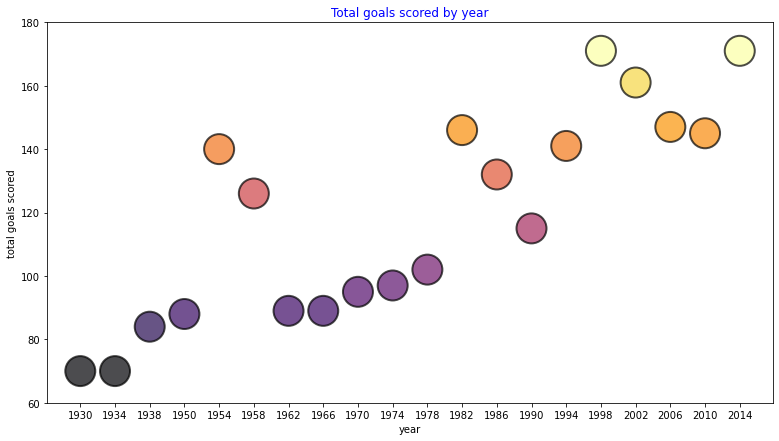

In [213]:
plt.figure(figsize=(13,7))
wc["Year1"] = wc["Year"].astype(str)
ax = plt.scatter("Year1","GoalsScored",data=wc,
            c=wc["GoalsScored"],cmap="inferno",
            s=900,alpha=.7,
            linewidth=2,edgecolor="k",)

#plt.colorbar()
plt.xticks(wc["Year1"].unique())
plt.yticks(np.arange(60,200,20))
plt.title('Total goals scored by year',color='b')
plt.xlabel("year")
plt.ylabel("total goals scored")
plt.show()

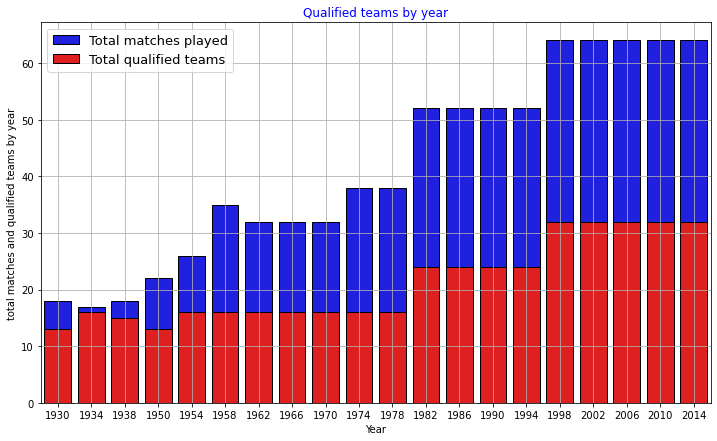

In [216]:
cups = wc.copy()
plt.figure(figsize=(12,7))
sns.barplot(cups["Year"],cups["MatchesPlayed"],linewidth=1,
            edgecolor="k"*len(cups),color="b",label="Total matches played")
sns.barplot(cups["Year"],cups["QualifiedTeams"],linewidth=1,
            edgecolor="k"*len(cups),color="r",label="Total qualified teams")
plt.legend(loc="best",prop={"size":13})
plt.title("Qualified teams by year",color='b')
plt.grid(True)
plt.ylabel("total matches and qualified teams by year")
plt.show()

In [219]:
matches = ma.copy()
matches.dropna().head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,All Goals
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,5.0
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,3.0


In [222]:
matches = ma.copy()
h_att = matches.sort_values(by="Attendance",ascending=False)[:10]
h_att = h_att[['Year', 'Datetime','Stadium', 'City', 'HomeTeamName',
              'HomeTeamGoals', 'AwayTeamGoals', 'AwayTeamName', 'Attendance', 'MatchID']]
h_att["Stadium"] = h_att["Stadium"].replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
h_att["Datetime"] = h_att["Datetime"].str.split("-").str[0]
h_att["mt"] = h_att["HomeTeamName"] + " .Vs.  " + h_att["AwayTeamName"]

plt.figure(figsize=(10,9))
ax = sns.barplot(y =h_att["mt"],x = h_att["Attendance"],palette="gist_ncar",
                 linewidth = 1,edgecolor="k"*len(h_att))
plt.ylabel("match teams")
plt.xlabel("Attendance")
plt.title("Matches with highest number of attendace",color='b')
plt.grid(True)
for i,j in enumerate(" stadium : "+h_att["Stadium"]+" , Date :" + h_att["Datetime"]):
    ax.text(.7,i,j,fontsize = 12,color="white",weight = "bold")
plt.show()

KeyError: "['HomeTeamName', 'AwayTeamGoals', 'AwayTeamName', 'HomeTeamGoals'] not in index"

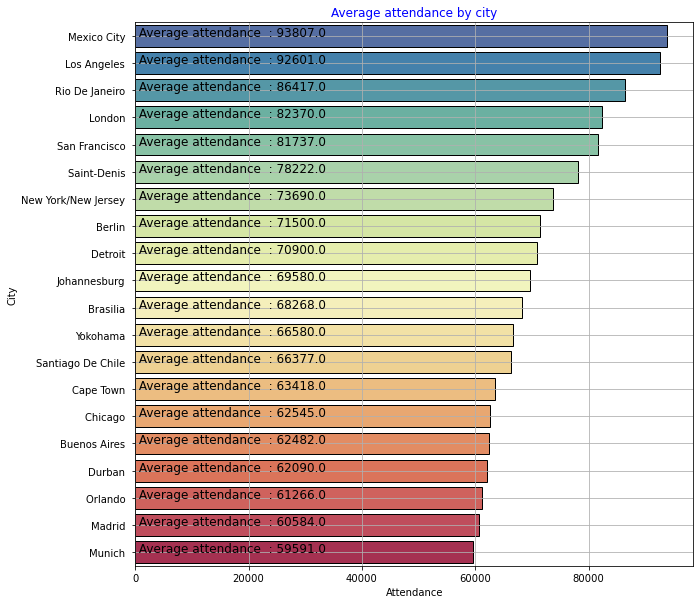

In [223]:
ct_at = matches.groupby("City")["Attendance"].mean().reset_index()
ct_at = ct_at.sort_values(by="Attendance",ascending=False)
ct_at

plt.figure(figsize=(10,10))

ax = sns.barplot("Attendance","City",
            data=ct_at[:20],
            linewidth = 1,
            edgecolor = "k"*20,
            palette  = "Spectral_r")

for i,j in enumerate(" Average attendance  : "+np.around(ct_at["Attendance"][:20],0).astype(str)):
    ax.text(.7,i,j,fontsize=12)
plt.grid(True)

plt.title("Average attendance by city",color='b')
plt.show()

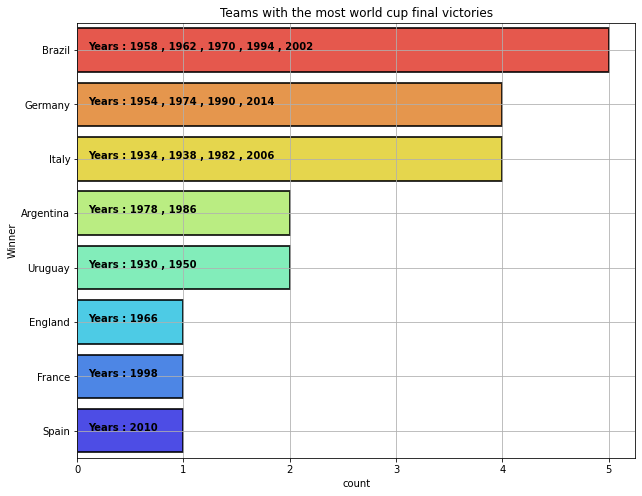

In [224]:
cups["Winner"]=cups["Winner"].replace("Germany FR","Germany")
cups["Runners-Up"]=cups["Runners-Up"].replace("Germany FR","Germany")
c1  = cups.groupby("Winner")["Year1"].apply(" , ".join).reset_index()
c2  = cups.groupby("Winner")['Year'].count().reset_index()
c12 = c1.merge(c2,left_on="Winner",right_on="Winner",how="left")
c12 = c12.sort_values(by = "Year",ascending =False)

plt.figure(figsize=(10,8))
ax = sns.barplot("Year","Winner",data=c12,
            palette="jet_r",
            alpha=.8,
            linewidth=2,
            edgecolor="k"*len(c12))
for i,j in enumerate("Years : " + c12["Year1"]):
    ax.text(.1,i,j,weight = "bold")

plt.title("Teams with the most world cup final victories")
plt.grid(True)
plt.xlabel("count")
plt.show()